Based off examples found at:
https://medium.com/cascade-bio-blog/creating-visualizations-to-better-understand-your-data-and-models-part-1-a51e7e5af9c0

In [1]:
# to export figures
# pip install kaleido

In [2]:
# will cleanup unused imports later
import numpy as np
import pandas as pd
import kaleido
from scipy.stats import zscore
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, SpectralClustering
from sklearn import metrics, cluster, preprocessing
import matplotlib.pyplot as plt
%matplotlib inline
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

Read the pulsar data in. Notice we seperate the ground truth column.

In [3]:
path = "../data"

pulsar_data = pd.read_csv(path + "/input/HTRU2/HTRU_2.csv", 
                          low_memory=False, index_col=False, usecols=[*range(0, 8)], header=0, 
                          names=["mean_IP", "standDev_IP", "excessKurt_IP", "skewness_IP", 
                                 "mean_DMSNR", "standDev_DMSNR", "excessKurt_DMSNR", "skewness_DMSNR"])
ground_truth = pd.read_csv(path + "/input/HTRU2/HTRU_2.csv", 
                           low_memory=False, index_col=False, usecols=[8], header=0, 
                           names=["pulsar"])
# print(pulsar_data.head())
# print(ground_truth.head())

In [4]:
X = pulsar_data.copy()

Scale the data using StandardScaler.

In [5]:
X_tr = preprocessing.StandardScaler().fit_transform(X)

The clustering method is chosen. Other clustering methods can be added to this visualtization very easily.

In [6]:
# kmeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
clusters = kmeans.predict(X)
X["Cluster"] = clusters

In [7]:
# spectral clustering
# sc = cluster.SpectralClustering(2, affinity='nearest_neighbors', n_jobs=-1).fit(X_tr)
# X["Cluster"] = sc.labels_

We will assign X to plotX for ease of understanding.

In [8]:
plotX = X

Create Principal Component Analysis based of 2 and 3 components.

In [9]:
pca_2d = PCA(n_components=2)
pca_3d = PCA(n_components=3)

Load the pca data into pandas dataframes and assign column names.

In [10]:
PCs_2d = pd.DataFrame(pca_2d.fit_transform(plotX.drop(["Cluster"], axis=1)))
PCs_3d = pd.DataFrame(pca_3d.fit_transform(plotX.drop(["Cluster"], axis=1)))

# Non-clustering
# PCs_2d = pd.DataFrame(pca_2d.fit_transform(plotX))
# PCs_3d = pd.DataFrame(pca_3d.fit_transform(plotX))

PCs_2d.columns = ["PC1_2d", "PC2_2d"]
PCs_3d.columns = ["PC1_3d", "PC2_3d", "PC3_3d"]

In [11]:
plotX = pd.concat([plotX,PCs_2d,PCs_3d], axis=1, join='inner')
# print(plotX)

In [12]:
# Clustering (comment out for non-clustering)
cluster0 = plotX[plotX["Cluster"] == 0]
cluster1 = plotX[plotX["Cluster"] == 1]

In [13]:
init_notebook_mode(connected=True)

In [14]:
fig = go.Figure()

layout = dict(title = "Pulsar Data in 2d", 
              xaxis= dict(title= 'PC1'), 
              yaxis= dict(title= 'PC2'),
              legend= dict(traceorder='reversed',
                           itemsizing='constant',
                font=dict(
                    size=14)))

# Clustering
# trace0 = go.Scatter(
#                     x = cluster0["PC1_2d"],
#                     y = cluster0["PC2_2d"],
#                     mode = "markers",
#                     name = "Non-Pulsar",
#                     marker=dict(color='LightGreen', size=4, 
#                                 line=dict(color='black', width=1)),
#                     text = None)
# 
# trace1 = go.Scatter(
#                     x = cluster1["PC1_2d"],
#                     y = cluster1["PC2_2d"],
#                     mode = "markers",
#                     name = "Pulsar",
#                     marker=dict(color='LightSkyBlue', size=4, 
#                                 line=dict(color='black', width=1)),
#                     text = None)
# 
# fig.add_trace(trace0)
# fig.add_trace(trace1)
# -------------------

# Non-clustering
trace0 = go.Scatter(
                    x = plotX["PC1_2d"],
                    y = plotX["PC2_2d"],
                    mode = "markers",
                    marker=dict(color='LightSkyBlue', size=4, 
                                line=dict(color='black', width=1)),
                    text = None)
fig.add_trace(trace0)
# -------------------

fig.update_layout(layout)
fig.update_yaxes(automargin=True)
fig.write_image(path + "/output/pulsar_viz_2d_non_clustered.png")
fig.show()

In [15]:
fig = go.Figure()

layout = dict(title = "Pulsar Data in 3d",
              xaxis= dict(title= 'PC1'),
              yaxis= dict(title= 'PC2'),
              legend= dict(traceorder='reversed',
                           itemsizing='constant',
                font=dict(
                    size=14)))

# Clustering
# trace0 = go.Scatter(
#                     x = cluster0["PC1_2d"],
#                     y = cluster0["PC2_2d"],
#                     mode = "markers",
#                     name = "Non-Pulsar",
#                     marker=dict(color='LightGreen', size=4, 
#                                 line=dict(color='black', width=1)),
#                     text = None)
# 
# trace1 = go.Scatter3d(
#                     x = cluster1["PC1_3d"],
#                     y = cluster1["PC2_3d"],
#                     z = cluster1["PC3_3d"],
#                     mode = "markers",
#                     name = "Pulsar",
#                     marker=dict(color='lightskyblue', size=2, 
#                                 line=dict(color='black', width=1)),
#                     text = None)
# 
# fig.add_trace(trace0)
# fig.add_trace(trace1)
# -------------------

# Non-clustering
trace0 = go.Scatter3d(
                    x = plotX["PC1_3d"],
                    y = plotX["PC2_3d"],
                    z = plotX["PC3_3d"],
                    mode = "markers",
                    marker=dict(color='lightskyblue', size=2, 
                                line=dict(color='black', width=1)),
                    text = None)
fig.add_trace(trace0)
# -------------------

fig.update_layout(layout)
fig.write_image(path + "/output/pulsar_viz_3d_non_clustered.png")
fig.write_html("../html/pulsar_viz_3d_non_clustered.html")
fig.show()

In [16]:
print(pca_2d.explained_variance_ratio_)

[0.87105737 0.07819042]


In [17]:
print(pca_3d.explained_variance_ratio_)

[0.87105737 0.07819042 0.04115499]


A Heatmap will be created to visualize the impact of each feature on the PCA. A PCA will be created with all 8 available features.

In [18]:
pca_8d = PCA(n_components=8)
PCs_8d = pd.DataFrame(pca_8d.fit_transform(plotX))
PCs_8d.columns = ["PC1_8d", "PC2_8d", "PC3_8d", "PC4_8d", "PC5_8d", "PC6_8d", "PC7_8d", "PC8_8d"]
# Transpose so that PCs are along y axis
PCs_8d = PCs_8d.transpose()
print(PCs_8d.shape)

(8, 17897)


The explained variance values will show how important each feature is to the analysis.

In [19]:
pca_8d_ratios = pca_8d.explained_variance_ratio_
np.set_printoptions(suppress=True)
print(pca_8d_ratios.round(2))

[0.89 0.08 0.03 0.   0.   0.   0.   0.  ]


The ratios show that between PC1 and PC2, 97% of the variance is accounted for.

We will now perform dot product of X and PCs_8d to determine which features makes up PC1 and PC2.

In [20]:
# drop our prediction "Cluster" column IF NOT CLUSTERING COMMENT OUT
X = X.drop(["Cluster"], axis=1)

In [21]:
# Ensure the shape of the dot product will be 8x8
print(PCs_8d.shape)
print(X.shape)

(8, 17897)
(17897, 8)


In [22]:
# y axis = PCs
# x axis = features
feature_importance_np = np.dot(PCs_8d, X)
feature_importance_df = pd.DataFrame(feature_importance_np, 
                                     columns=X.columns,
                                     index=PCs_8d.index)
feature_importance_df = feature_importance_df.round(2)
# Transpose to stay consistent with exmaple being followed
feature_importance_df = feature_importance_df.transpose()
print(feature_importance_df)

                        PC1_8d       PC2_8d       PC3_8d      PC4_8d  \
mean_IP           1.420434e+07 -15973936.74  11628531.70   -64380.21   
standDev_IP       7.655426e+05  -1573310.23   2303805.73    65079.36   
excessKurt_IP    -8.512773e+05    694303.44   -364665.89    -6559.33   
skewness_IP      -4.705167e+06   3699830.89  -1680536.16   -31017.63   
mean_DMSNR       -3.887318e+07  24489209.49   6497202.86   648073.08   
standDev_DMSNR   -3.962809e+07  12339508.75   2741104.03 -1314040.65   
excessKurt_DMSNR  1.413401e+07  -1196786.53   -295016.02    79706.56   
skewness_DMSNR    3.557749e+08   4789451.97    534614.77   -76712.51   

                     PC5_8d     PC6_8d   PC7_8d  PC8_8d  
mean_IP          -123363.47   22304.01    -3.36   -0.32  
standDev_IP       535394.87   80568.55   -79.73    0.24  
excessKurt_IP     -14343.83   24892.88    66.76  -30.05  
skewness_IP      -189797.74  211531.97  -138.14    4.27  
mean_DMSNR        -28726.99   -9522.30  -164.14   -0.08  
sta

Matplotlib implementation

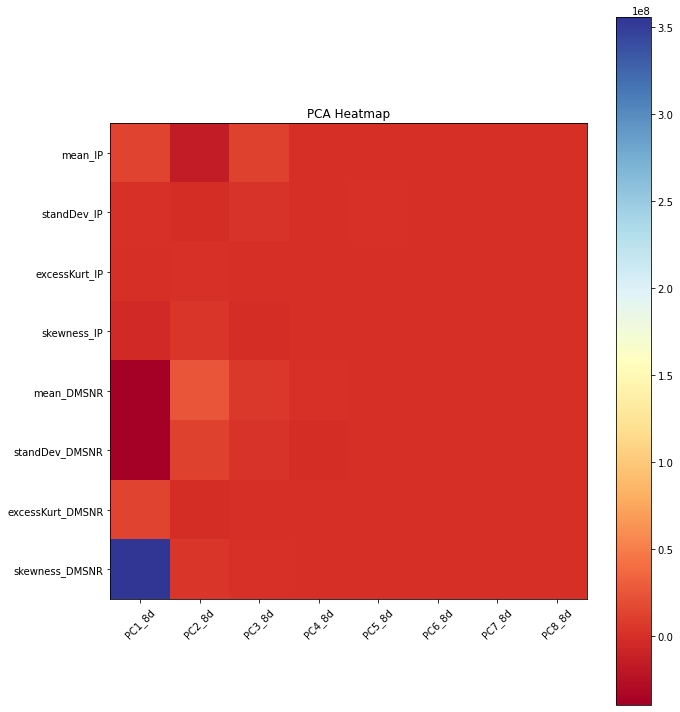

In [23]:
plt.rcParams['figure.figsize'] = [10, 10]
plt.imshow(feature_importance_df, cmap ="RdYlBu")
plt.colorbar()
plt.xticks(range(len(feature_importance_df)), feature_importance_df.columns)
plt.xticks(rotation = 45)
plt.yticks(range(len(feature_importance_df)), feature_importance_df.index)
title = "PCA Heatmap"
plt.title(title)
plt.tight_layout()
plt.savefig(path + "/output/pca_8d_heatmap.png")
plt.show()

Heatmap with numbers

<AxesSubplot:>

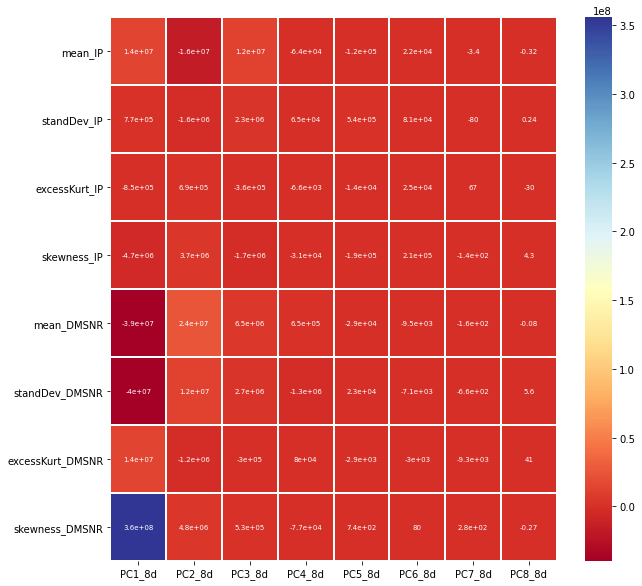

In [24]:
sns.heatmap(feature_importance_df, cmap ='RdYlBu', linewidths = 0.30, annot = True, 
            annot_kws={'size':7})

Z-score normalize our feature importance data to make the visualization easier to comprehend. 

In [25]:
feature_importance_df_z = feature_importance_df.apply(zscore)

Recreate the heatmap with the Z-score normalized data.

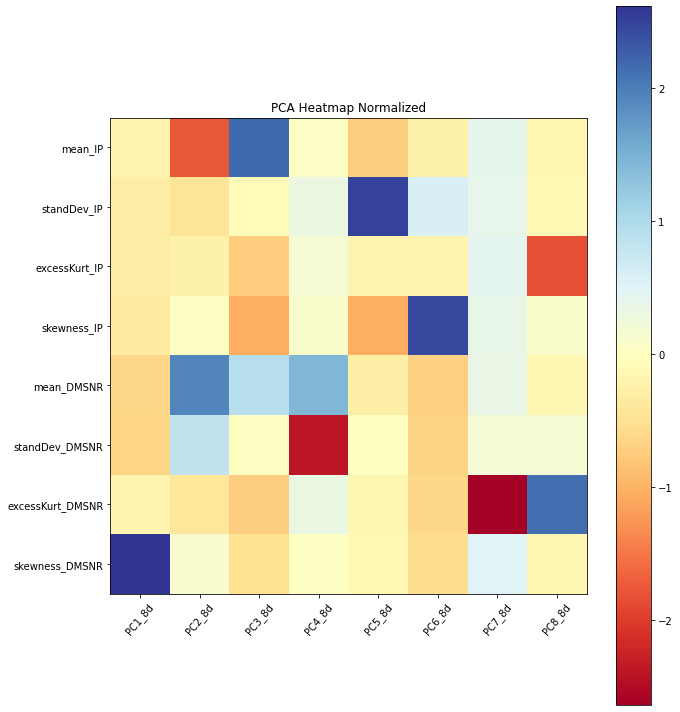

In [26]:
plt.rcParams['figure.figsize'] = [10, 10]
plt.imshow(feature_importance_df_z, cmap ="RdYlBu")
plt.colorbar()
plt.xticks(range(len(feature_importance_df_z)), feature_importance_df_z.columns)
plt.xticks(rotation = 50)
plt.yticks(range(len(feature_importance_df_z)), feature_importance_df_z.index)
title = "PCA Heatmap Normalized"
plt.title(title)
plt.tight_layout()
plt.savefig(path + "/output/pca_8d_heatmap_zscore.png")
plt.show()

To further emphasize feature importance, we will normalize our chart using absolute value of the Z-score dataframe and the explained variance vector.

Take the absolute values from the zscore df. Assign explained variance to a variable.

In [27]:
feature_importance_df_z_abs = feature_importance_df_z.abs()
explained_variance = pca_8d.explained_variance_

Normalize df_z_abs by the explained variance vector.

In [28]:
feature_importance_df_z_abs_ev = feature_importance_df_z_abs*explained_variance

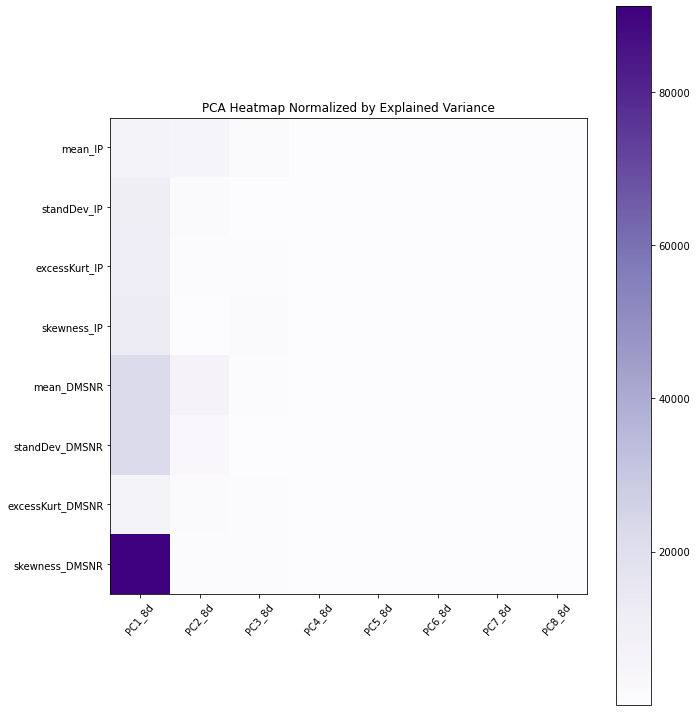

In [29]:
plt.rcParams['figure.figsize'] = [10, 10]
plt.imshow(feature_importance_df_z_abs_ev, cmap ="Purples")
plt.colorbar()
plt.xticks(range(len(feature_importance_df_z_abs)), feature_importance_df_z_abs.columns)
plt.xticks(rotation = 50)
plt.yticks(range(len(feature_importance_df_z_abs)), feature_importance_df_z_abs.index)
title = "PCA Heatmap Normalized by Explained Variance"
plt.title(title)
plt.tight_layout()
plt.savefig(path + "/output/pca_8d_heatmap_final_explained_variance.png")
plt.show()

Reprint explained variance ratios for ease of access

In [30]:
print(pca_8d_ratios.round(2))

[0.89 0.08 0.03 0.   0.   0.   0.   0.  ]


The heatmaps above agree that PC1 makes up the majority of the variance in our data. Furthermore, the following features are identified as key players: skewness_DMSNR, mean_DMSNR,and standDev_DMSNR.